In [40]:
import numpy as np
from ppgfilter import PPGFilter
import neurokit2 as nk
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import warnings


In [41]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [42]:
def get_feature_nk(ppg, fr_ppg, label, feature):
    peaks, _ = nk.ppg_peaks(ppg, sampling_rate=fr_ppg, show=False, method="elgendi")

    hrv_indices = nk.hrv(
        peaks, 
        sampling_rate=fr_ppg,
        frequency=True,
        frequency_method="welch",
        frequency_params={"lf_band": [0.04, 0.15], "hf_band": [0.15, 0.4]},
        nonlinear=False,
        entropy=False, 
        dfa=False
    )
    
    hrv_indices['stress_index'] = label
    filt_hrv_indices = hrv_indices[feature]
    
    return filt_hrv_indices.iloc[0].to_dict()

In [43]:
data = np.load('dataset.npy', allow_pickle=True)
ppg_filter = PPGFilter()
ppg_fr = 256

feature = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 
           'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 
           'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN',
           'HRV_HTI', 'HRV_TINN', 'HRV_HF', "HRV_LF", "HRV_LFn", 
           "HRV_HFn", "HRV_LFHF", "stress_index"]

feature_list = []

In [44]:
# filt_ppg = ppg_filter.filter(ppg=data[0][0], ppg_fr=ppg_fr)

# # Детекция пиков
# peaks, info = nk.ppg_peaks(filt_ppg, sampling_rate=ppg_fr, show=False)
# peaks_positions = np.where(peaks)[0]  # Индесы пиков

# # Построение графика
# plt.figure(figsize=(40, 4))
# plt.plot(filt_ppg, label='PPG signal', color='#1f77b4')

# # Отметка пиков красными точками
# plt.scatter(peaks_positions, filt_ppg[peaks_positions], 
#             color='red', s=50, label='R-peaks', zorder=3)

# # Настройки графика
# plt.title('PPG Signal with R-Peaks Detection')
# plt.xlabel('Samples')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# # Извлечение признаков (ваш существующий код)
# features = get_feature_nk(filt_ppg, ppg_fr, 0, feature)
# print(len(filt_ppg) // 256, len(filt_ppg[filt_ppg != 0]) // 256)
# features

In [45]:
feature_list = []
window_size = 60 * ppg_fr
step = 10 * ppg_fr

for ppg, label in data:
    filt_ppg = ppg_filter.filter(ppg=ppg, ppg_fr=ppg_fr)
    
    n_samples = len(filt_ppg)
    for start in range(0, n_samples - window_size + 1, step):
        end = start + window_size
        window = filt_ppg[start:end]
        

        if np.count_nonzero(window) >= 0.8 * window_size:
            features = get_feature_nk(ppg=window, 
                                     fr_ppg=ppg_fr, 
                                     label=label, 
                                     feature=feature)
            feature_list.append(features)

features_data = pd.DataFrame(feature_list, columns=feature)

In [46]:
features_data

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,HRV_HF,HRV_LF,HRV_LFn,HRV_HFn,HRV_LFHF,stress_index
0,888.732910,940.588907,1315.393650,1325.959225,1.058348,1.480078,777.343750,75.288281,64.062500,82.812500,566.40625,8257.81250,12.800000,234.3750,0.001878,0.029544,0.939214,0.059699,15.732547,1.0
1,741.149130,104.915879,155.033324,156.027375,0.141558,0.209180,726.562500,63.705469,59.493671,77.215190,515.62500,984.37500,9.875000,195.3125,0.106623,0.033651,0.186152,0.589822,0.315608,1.0
2,772.512336,118.893602,187.458220,188.711656,0.153905,0.242660,751.953125,69.496875,57.894737,75.000000,515.62500,1011.71875,12.666667,242.1875,0.098534,0.007643,0.058803,0.758114,0.077565,4.0
3,783.511513,118.121733,181.445768,182.662935,0.150759,0.231580,767.578125,86.871094,59.210526,77.631579,515.62500,1027.34375,15.200000,203.1250,0.107435,0.009447,0.060906,0.692620,0.087935,4.0
4,793.338260,118.079809,183.366475,184.635431,0.148839,0.231133,789.062500,83.975391,62.162162,79.729730,515.62500,1027.34375,14.800000,257.8125,0.088432,0.003264,0.030351,0.822230,0.036914,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,495.043330,212.761783,242.268110,243.290112,0.429784,0.489388,406.250000,34.748438,42.016807,68.067227,328.12500,2019.53125,8.500000,78.1250,0.046995,0.062213,0.555018,0.419257,1.323812,4.0
116,469.070184,198.789804,229.608085,230.561139,0.423795,0.489496,406.250000,31.852734,33.606557,63.934426,328.12500,2019.53125,8.714286,109.3750,0.037868,0.061587,0.604823,0.371885,1.626372,4.0
117,508.991110,291.401933,292.490325,293.752119,0.572509,0.574647,414.062500,37.644141,33.620690,62.068966,351.56250,2402.34375,8.923077,85.9375,0.030368,0.038356,0.550903,0.436172,1.263041,4.0
118,491.260593,242.854681,238.267019,239.270626,0.494350,0.485011,425.781250,49.226953,32.203390,61.864407,351.56250,2402.34375,9.833333,70.3125,0.018289,0.027184,0.574964,0.386834,1.486332,4.0


In [47]:
features_data.to_csv("feature.csv", index=False)

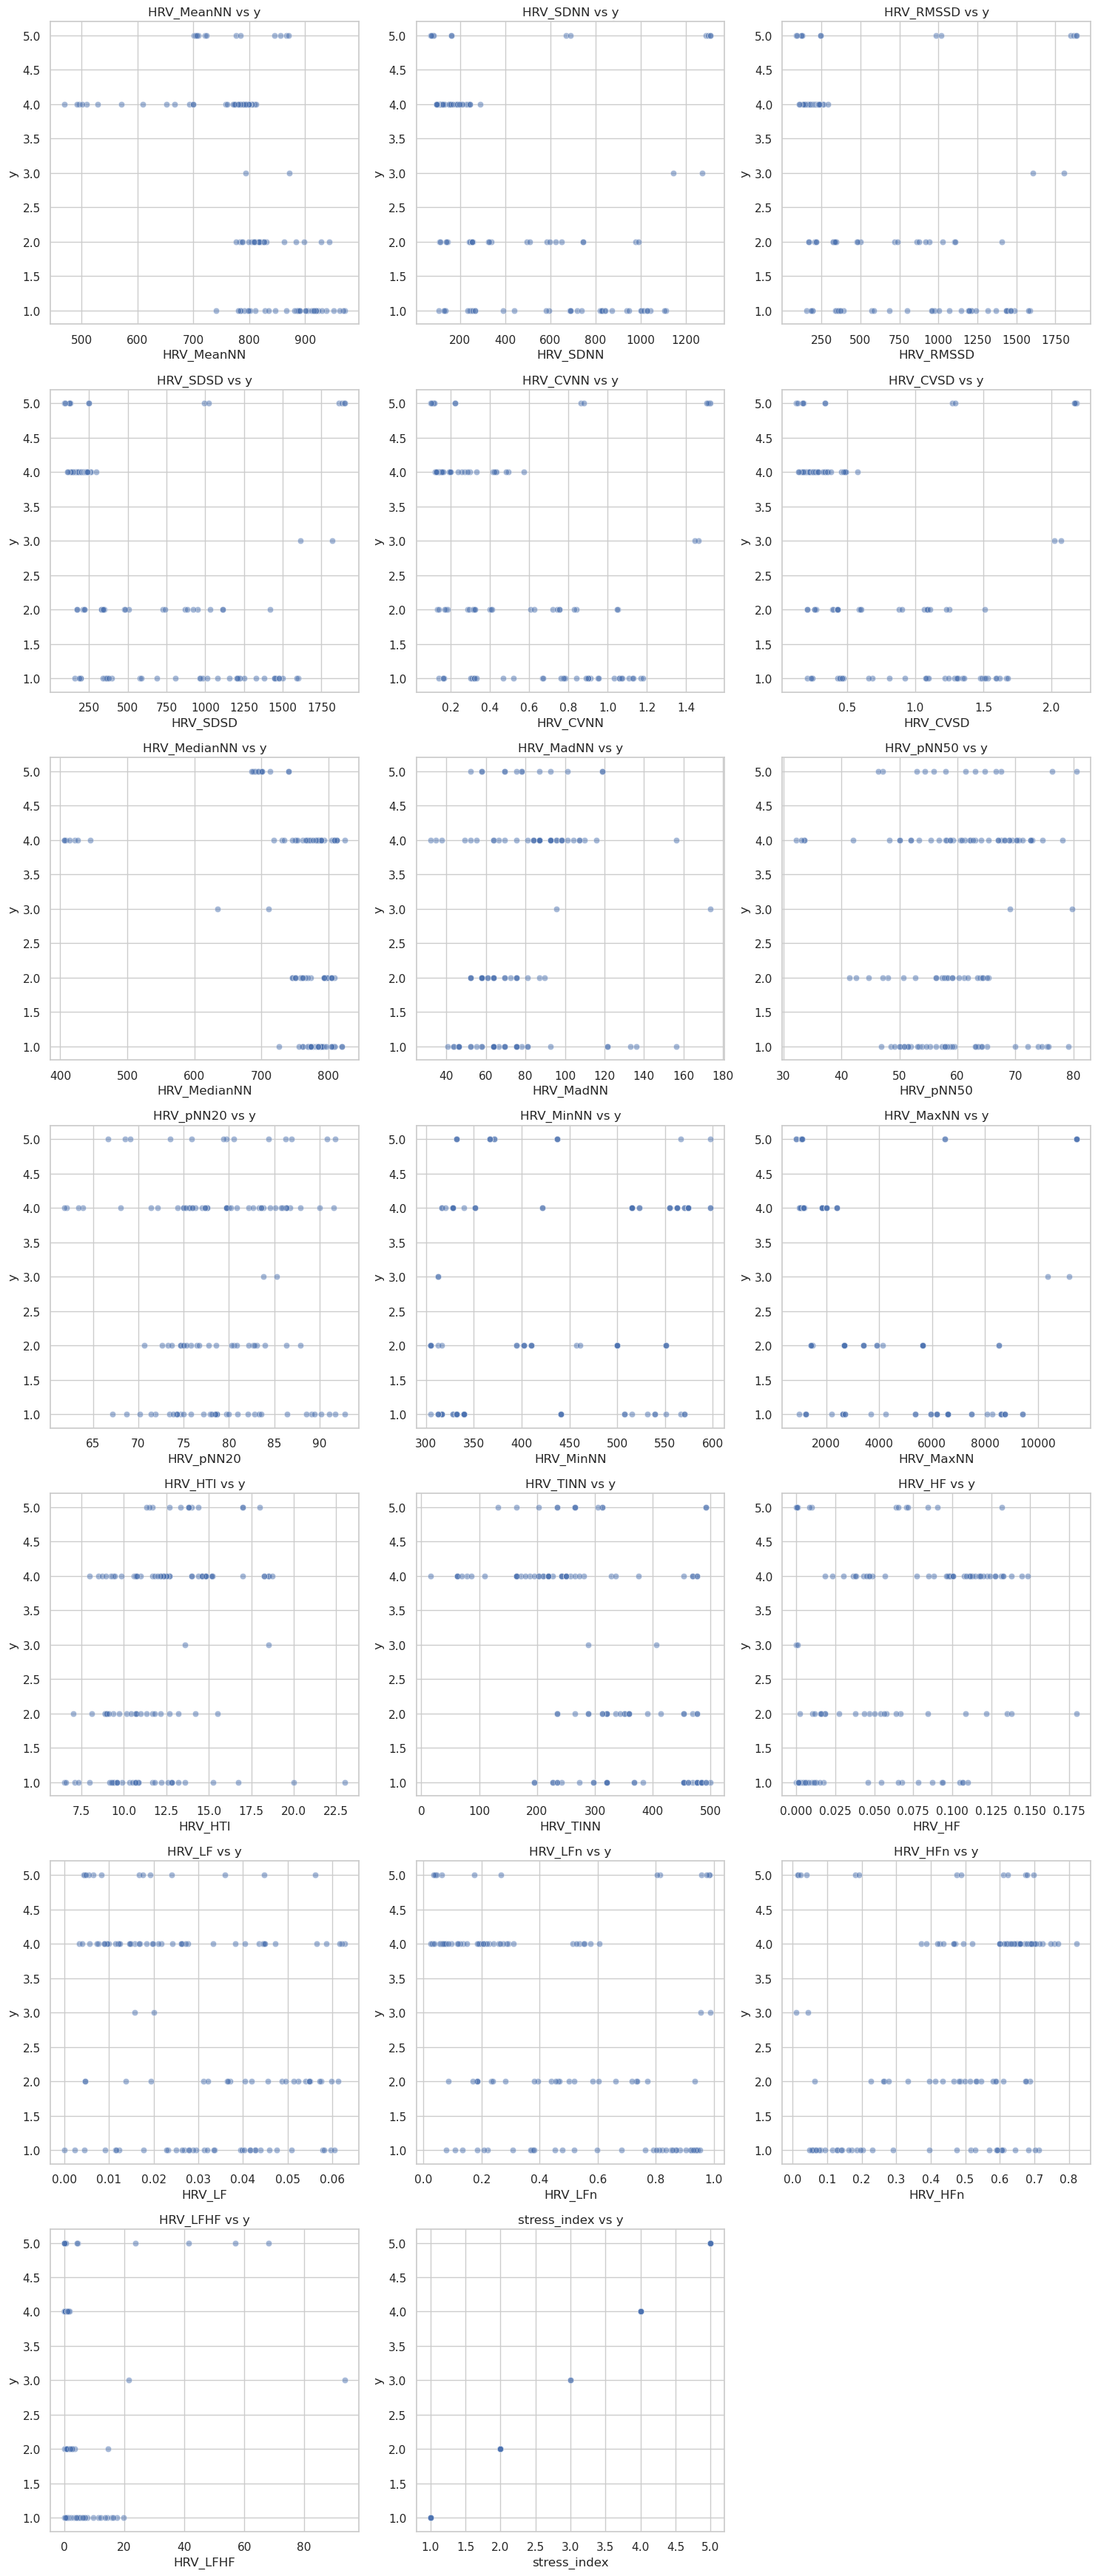

In [48]:
sns.set(style="whitegrid")

n_features = len(feature)
n_cols = 3  
n_rows = (n_features + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)  

for i, feature in enumerate(feature):
    row, col = i // n_cols, i % n_cols
    sns.scatterplot(
        x=features_data[feature], 
        y=features_data['stress_index'], 
        alpha=0.5,  
        ax=axes[row, col]
    )
    axes[row, col].set_title(f'{feature} vs y')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('y')

for j in range(i+1, n_rows*n_cols):
    row, col = j // n_cols, j % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor

feature_df = pd.read_csv("feature.csv")
y_train = feature_df["stress_index"]
X_train = feature_df.drop("stress_index", axis=1)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_jobs=-1,
                      random_state=42)

In [50]:
feature_df

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,HRV_HF,HRV_LF,HRV_LFn,HRV_HFn,HRV_LFHF,stress_index
0,888.732910,940.588907,1315.393650,1325.959225,1.058348,1.480078,777.343750,75.288281,64.062500,82.812500,566.40625,8257.81250,12.800000,234.3750,0.001878,0.029544,0.939214,0.059699,15.732547,1.0
1,741.149130,104.915879,155.033324,156.027375,0.141558,0.209180,726.562500,63.705469,59.493671,77.215190,515.62500,984.37500,9.875000,195.3125,0.106623,0.033651,0.186152,0.589822,0.315608,1.0
2,772.512336,118.893602,187.458220,188.711656,0.153905,0.242660,751.953125,69.496875,57.894737,75.000000,515.62500,1011.71875,12.666667,242.1875,0.098534,0.007643,0.058803,0.758114,0.077565,4.0
3,783.511513,118.121733,181.445768,182.662935,0.150759,0.231580,767.578125,86.871094,59.210526,77.631579,515.62500,1027.34375,15.200000,203.1250,0.107435,0.009447,0.060906,0.692620,0.087935,4.0
4,793.338260,118.079809,183.366475,184.635431,0.148839,0.231133,789.062500,83.975391,62.162162,79.729730,515.62500,1027.34375,14.800000,257.8125,0.088432,0.003264,0.030351,0.822230,0.036914,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,495.043330,212.761783,242.268110,243.290112,0.429784,0.489388,406.250000,34.748438,42.016807,68.067227,328.12500,2019.53125,8.500000,78.1250,0.046995,0.062213,0.555018,0.419257,1.323812,4.0
116,469.070184,198.789804,229.608085,230.561139,0.423795,0.489496,406.250000,31.852734,33.606557,63.934426,328.12500,2019.53125,8.714286,109.3750,0.037868,0.061587,0.604823,0.371885,1.626372,4.0
117,508.991110,291.401933,292.490325,293.752119,0.572509,0.574647,414.062500,37.644141,33.620690,62.068966,351.56250,2402.34375,8.923077,85.9375,0.030368,0.038356,0.550903,0.436172,1.263041,4.0
118,491.260593,242.854681,238.267019,239.270626,0.494350,0.485011,425.781250,49.226953,32.203390,61.864407,351.56250,2402.34375,9.833333,70.3125,0.018289,0.027184,0.574964,0.386834,1.486332,4.0


In [51]:
X_train.columns

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_pNN50', 'HRV_pNN20',
       'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_HF', 'HRV_LF',
       'HRV_LFn', 'HRV_HFn', 'HRV_LFHF'],
      dtype='object')

In [58]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
pd.DataFrame(importances).head(10)

,Feature,Importance
6,HRV_MedianNN,0.228467
11,HRV_MaxNN,0.189239
2,HRV_RMSSD,0.162474
0,HRV_MeanNN,0.114507
3,HRV_SDSD,0.099840
13,HRV_TINN,0.041556
10,HRV_MinNN,0.033713
12,HRV_HTI,0.031125
7,HRV_MadNN,0.020756
1,HRV_SDNN,0.018920
